In [1]:
%load_ext autoreload
%autoreload 2     

In [2]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
sc.set_figure_params(scanpy=True, dpi=100, dpi_save=150, frameon=True, vector_friendly=True, fontsize=8)

In [3]:
import os
import numpy as np
import torch
import pandas as pd
from sklearn import metrics
import multiprocessing as mp
from GARDEN import GARDEN
import scanpy as sc
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
os.environ['R_HOME'] = "/home/zhangxinming/anaconda3/envs/Test/lib/R"

In [4]:
adata = sc.datasets.visium_sge(sample_id="V1_Human_Brain_Section_2")

/home/zhangxinming/anaconda3/envs/stGACN_env/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [ ]:
# Set radius to make sure graph for Graph Dynamic Attention contains around 12 edges
model = GARDEN.GARDEN(adata,model_select='Radius',k_cl=7,rad_cutoff=500,device=device)
adatas1 = model.train()

/home/zhangxinming/anaconda3/envs/stGACN_env/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


The graph contains 29832 edges, 4972 cells.
6.0000 neighbors per cell on average.
Graph_2 Construction
The graph contains 58144 edges, 4972 cells.
11.6943 neighbors per cell on average.
Begin to train ST data...


  0%|          | 1/800 [00:00<05:28,  2.44it/s]

Epoch 0, Overall Loss: 28.6272


 13%|█▎        | 103/800 [00:09<00:59, 11.78it/s]

Epoch 100, Overall Loss: 12.0472


 25%|██▌       | 203/800 [00:17<00:50, 11.74it/s]

Epoch 200, Overall Loss: 8.8176


 38%|███▊      | 303/800 [00:26<00:42, 11.67it/s]

Epoch 300, Overall Loss: 8.1701


 50%|█████     | 403/800 [00:35<00:34, 11.66it/s]

Epoch 400, Overall Loss: 7.8185


 63%|██████▎   | 503/800 [00:43<00:25, 11.65it/s]

Epoch 500, Overall Loss: 7.5761


 75%|███████▌  | 603/800 [00:52<00:16, 11.71it/s]

Epoch 600, Overall Loss: 7.4240


 88%|████████▊ | 703/800 [01:01<00:08, 11.64it/s]

Epoch 700, Overall Loss: 7.0283


100%|██████████| 800/800 [01:09<00:00, 11.52it/s]


Optimization finished for ST data!


In [6]:
n_clusters = 7
radius = 30
tool = 'mclust' # mclust, leiden, and louvain

# clustering
from GARDEN.utils import clustering

if tool == 'mclust':
   clustering(adatas1, n_clusters, radius=radius, method=tool, refinement=True) # For DLPFC dataset, we use optional refinement step.
elif tool in ['leiden', 'louvain']:
   clustering(adatas1, n_clusters, radius=radius, method=tool, start=0.1, end=0.8, increment=0.01, refinement=False)

R[write to console]:                    __           __ 
   ____ ___  _____/ /_  _______/ /_
  / __ `__ \/ ___/ / / / / ___/ __/
 / / / / / / /__/ / /_/ (__  ) /_  
/_/ /_/ /_/\___/_/\__,_/____/\__/   version 6.0.0
Type 'citation("mclust")' for citing this R package in publications.



fitting ...
  |======================================================================| 100%


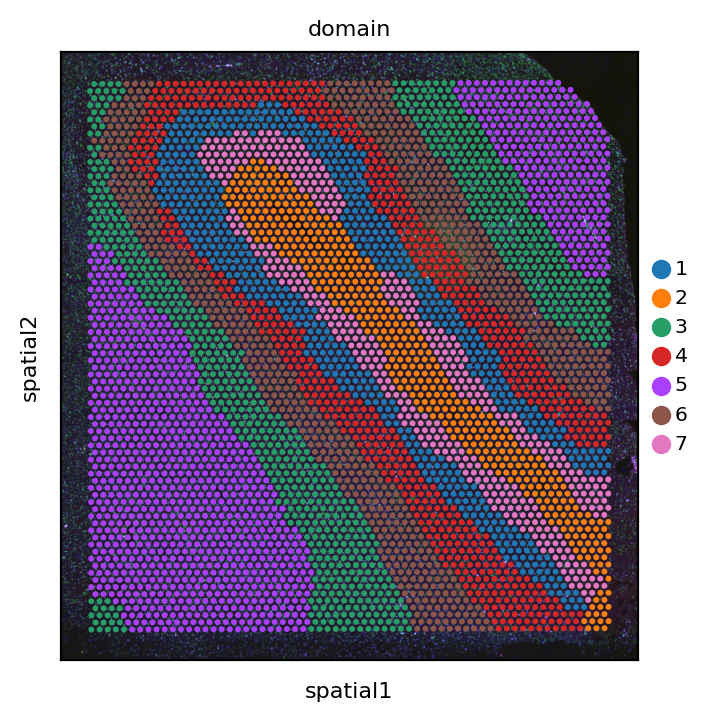

In [7]:
sc.pl.spatial(adatas1,basis='spatial',color = ['domain'],spot_size = 200)